In [5]:
import pandas as pd, GPy, seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
%run load_data.py rnaseq

loading rnaseq data
rnaseq_all_genes: (11216, 104)
rnaseq_effector_genes: (1044, 104)
rnaseq_mod_activities: (89, 104)
rnaseq_mod_genevals: (172, 104)
rnaseq_mod_nodevals: (462, 104)
rnaseq_signaling_genes: (2184, 104)
rnaseq_design: (104, 4)


In [12]:
Y = rnaseq_mod_genevals.T.copy()
Y -= Y.mean()
Y /= Y.std()
Y = Y.dropna(axis=1).values

NameError: name 'rnaseq_mod_genevals' is not defined

In [6]:
m = GPy.models.BayesianGPLVM(Y, 6, num_inducing=40)

In [7]:
m.likelihood.fix(0.1)
m.X.variance.fix(0.1)
m.optimize(messages=1, max_iters=300)

In [8]:
m.X.variance.unfix()
m.optimize(messages=1, max_iters=600)

In [9]:
m.likelihood.unfix()
m.optimize(messages=1, max_iters=3e5)

 /Users/maxz/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
 /Users/maxz/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


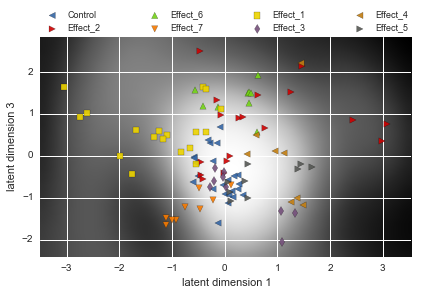

In [11]:
m.plot_magnification(labels=rnaseq_design.Effect)

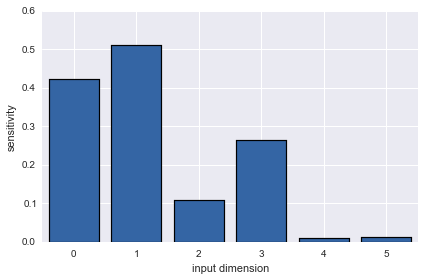

In [29]:
m.kern.plot_ARD()